# Excitation forces

We want to estimate the excitation forces on circular cylindrical tank on the sea-floor due to long incident waves.
The water depth is $h=50$ m and the tank height and diameter is $d=10$ m and $D=20$ m, respectively.
Added masses in heave and sway of the structure is $A_{33}=\rho D^3/6$ and $A_{22}=\rho\nabla d/(2h-d)$, where $\nabla$ is the displacement of the tank.
The tank is exposed to incident regular waves with period $T=16$ s and amplitude $\zeta_a=10$ m. The dispersion relation for finite water depth is
$$\omega^2=gk\tanh kh$$

When the structure is small compared to incindent wave length, the excitation forces from the waves can be approximated as
$$
F_i = -\iint_S p n_i \mathrm{d}S + A_{i1}a_1+A_{i2}a_2+A_{i3}a_3
$$
<div>
<img src="Figures/tank_on_seabed.PNG" width="600">
</div>

1) What is coupled added mass $A_{32}$?
2) Find the vertical and horizontal excitation force from the waves.

Wavelength: 307.82
Waterdepth to wavelength ratio, h/L=0.16
Excitation forces:
F3_tot : 20.244 MN
F3_fk  : 20.070 MN
F3_diff: 0.174 MN
F1_tot : 4.482 MN
F1_fk  : 4.034 MN
F1_fk2  : 4.041 MN
F1_diff: 0.448 MN


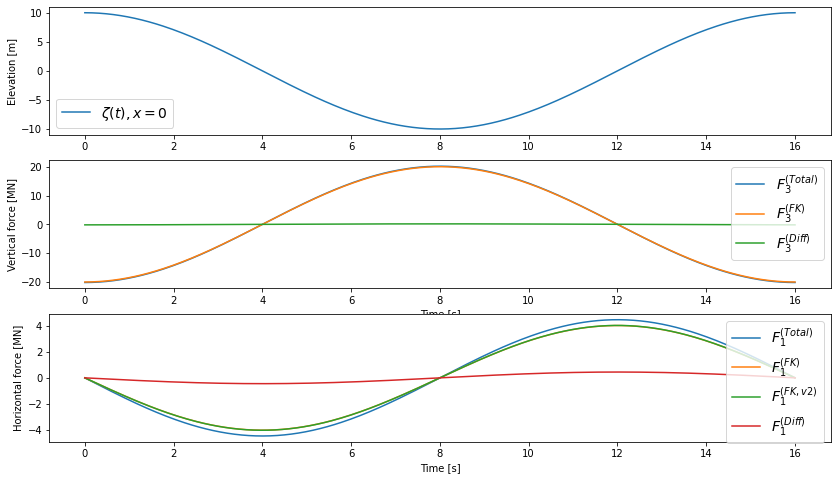

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import airywavelib as aw

# Input information:
h = 50. # [m] Water depth
D = 20. # [m] Tank diameter
d = 10. # [m] Tank height

# Wave data:
A = 10. # [m] Wave amplitude
T = 16. # [s] Wave period

rho = 1000. # [kg/m^3] Water density
g = 9.81 # [m/s^2] Acceleration of gravity

nabla = np.pi*(D**2/4.)*d # Displacement
A11 = rho*nabla*d/(2*h-d) # Surge added mass
A33 = rho*D**3/6.         # Heave added mass

# Construct wave:
wave = aw.airywave(T, A, waterDepth=h)
omega = 2*np.pi/T

wavenum = wave.k
wavelen = 2*np.pi/wavenum

print("Wavelength: {:.2f}".format(wavelen))
print("Waterdepth to wavelength ratio, h/L={:.2f}".format(h/wavelen))

# Vertical Froude-Kriloff force
# We assume uniform pressure over the tank top, evaluated at area center zt=-h+d.
zt = -h+d      # Vertical coord. of tank top
zm = -h+0.5*d  # Vertical coord. of tank centre

# Vertical forces:
F3_fk = lambda t: -(np.pi*D**2/4.) * wave.getDynamicPressure(0,zt,t) # You should practice derivation of pressure and accelerations by hand.
F3_diff = lambda t: A33*wave.getParticleAcceleration(0,zm, t)[1]

# Horizontal forces:
F1_fk = lambda t: rho*nabla*wave.getParticleAcceleration(0,zm, t)[0] # You should practice derivation of pressure and accelerations by hand.
F1_fk2 = lambda t: -rho*g*A*np.pi*D**2/4.*np.sinh(wavenum*d)/np.cosh(wavenum*h)*np.sin(omega*t)
F1_diff = lambda t: A11*wave.getParticleAcceleration(0,zm, t)[0]

tvec = np.linspace(0,T,300)

F3_max = np.max(F3_fk(tvec)+F3_diff(tvec))
F3fk_max = np.max(F3_fk(tvec))
F3diff_max = np.max(F3_diff(tvec))

F1_max = np.max(F1_fk(tvec)+F1_diff(tvec))
F1fk_max = np.max(F1_fk(tvec))
F1fk2_max = np.max(F1_fk2(tvec))
F1diff_max = np.max(F1_diff(tvec))

print("Excitation forces:")
print("F3_tot : {:.3f} MN".format(F3_max*1e-6))
print("F3_fk  : {:.3f} MN".format(F3fk_max*1e-6))
print("F3_diff: {:.3f} MN".format(F3diff_max*1e-6))
print("F1_tot : {:.3f} MN".format(F1_max*1e-6))
print("F1_fk  : {:.3f} MN".format(F1fk_max*1e-6))
print("F1_fk2  : {:.3f} MN".format(F1fk2_max*1e-6))
print("F1_diff: {:.3f} MN".format(F1diff_max*1e-6))


# Plot results
gs = gridspec.GridSpec(nrows=3, ncols=1)
fig = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(tvec, wave.getSurfaceElevation(0, tvec), label=r'$\zeta(t), x=0$')
ax1.legend(fontsize=14)
ax1.set_ylabel('Elevation [m]')

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(tvec, (F3_fk(tvec)+F3_diff(tvec))*1e-6, label=r'$F_3^{(Total)}$')
ax2.plot(tvec, F3_fk(tvec)*1e-6, label=r'$F_3^{(FK)}$')
ax2.plot(tvec, F3_diff(tvec)*1e-6, label=r'$F_3^{(Diff)}$')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Vertical force [MN]')
ax2.legend(fontsize=14)

ax3 = fig.add_subplot(gs[2,0])
ax3.plot(tvec, (F1_fk(tvec)+F1_diff(tvec))*1e-6, label=r'$F_1^{(Total)}$')
ax3.plot(tvec, F1_fk(tvec)*1e-6, label=r'$F_1^{(FK)}$')
ax3.plot(tvec, F1_fk2(tvec)*1e-6, label=r'$F_1^{(FK, v2)}$')
ax3.plot(tvec, F1_diff(tvec)*1e-6, label=r'$F_1^{(Diff)}$')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Horizontal force [MN]')
ax3.legend(fontsize=14)

## Example: Wave induced motions of semi-submercible
We will now consider a floating semi-submercible platform with two regantular cylindrical pontoons, supporting four vertical circular cylindrical columns or platform legs that carry the main deck. The pontoons have lenght $L=100$ m and rectangular cross-section with dimensions $a=11$ m and $b=7$ m as with and height, respectively. Depth to top side of the pontoons is $h_t=15$ m. Other dimensions are given below.
<div>
<img src="Figures/semisub_sideview.PNG" width="400">
</div>
<div>
<img src="Figures/semisub_frontview.PNG" width="400"><img src="Figures/semisub_dimensions.PNG" width="200">
</div>
We want to compute the heave response due to regular beam sea waves. The wave profile used in the textbook example is defined as $\zeta(y,t)=\zeta_a \sin(\omega t-ky)$. 
In order to compute the response in heave, we need to find the heave excitation force as well as the radiation force (added mass and damping) and restoring force. We remember that by means of linear potential flow theory, we can study the problem of a moving structure in waves by solving two sub-problems: 
1) Excitation problem: The wave excitation loads on a structure restrained from moving (yields Froude-Kriloff and diffraction forces)
2) Radiation problem: The hydrodynamic loads on a structure that is forced to move in calm water (yields added mass and damping forces)

### Radiation force
We remember that the radiation forces are decomposed into added mass and damping forces, propotional to the heave acceleration and heave velocity, respectively. Due to the large submergence of the pontoons, we can neglect the potential damping and obtain
$$F_3^{HD}=-A_{33}^P\ddot{\eta}_3$$
where from strip theory we have $A_{33}^P=2\int_L A_{33}^{(2D)}\mathrm{d}x$ for the two pontoons. We need to find the 2D added mass coefficient for the pontoon cross-section. Figure 3-23 in the textbook (B.Pettersen 2017) gives for our problem $A_{33}^{(2D)}= 1.75\rho B_2 D_2$, where $A_{strip}$ is the cross section area of the strip.
Hence, $A_{33}^P=1.75\rho V_P$, where $V_P$ is the total volume of the pontoons.

Now, let us have a look at some numbers.

In [19]:
# We start out with estimating the added mass:

rho = 1000. # [kg/m^3] Water density
B2 = 11.0   # [m] Cross-section width
D2 = 7.0    # [m] Cross-section height
L = 100.    # [m] Pontoon length
Cm = 1.75   # [-] Added mass coefficient from Fig. 3-23 for given L/D=D2/B2

print("D2/B2={:.2f}".format(D2/B2))

# Volume displacement of pontoons:
Vp = 2*(D2*B2*L)

# Added mass of pontoons:
A33p = Cm*rho*Vp
print("A33p={:.2e} kg".format(A33p))


D2/B2=0.64
A33p=2.70e+07 kg


### Excitation force
We assume that the incident wave is long compared to the cross-sectional dimensions of the pontoons, i.e. $\lambda>>B_2$. Then we can approximate the heave excitation force
$$F_3^{E}=-\iint_S p n_3\mathrm{d}S + A_{33}^P a_z$$
where $a_z$ is the particle acceleration at the center of the pontoon cross-section. Here we have assumed that the diffraction force can be expressed entirely by means of the added mass. The pressure integral represent the Froude-Kriloff force with the dynamic pressure from the incident wave. We can also approximate the Froude-Kriloff force for long waves as
$$-\iint_S p n_3\mathrm{d}S\approx \rho V_P a_z$$
Hence, we obtain
$$F_3^{E}\approx (\rho V_P + A_{33}^P) a_z $$
From the incident wave potential we obtain
$$a_z=-\omega^2\zeta_a \mathrm{e}^{kz}\sin(\omega t-ky)$$
which yields
$$\tilde{F}_3^{E}=-\omega^2\zeta_a \mathrm{e}^{kz_m}(\rho V_P + A_{33}^P)\cos(kB/2)\sin(\omega t)$$
We need to add a correction to our strip theory prediction of Froude-Kriloff forces due to the vertical columns attached to the top of the pontoons, as the intersection area on the pontoon top is not exposed to the hydrodynamic pressure.
$$F_3^{Corr.}=-\rho g\zeta_a\mathrm{e}^{kz_t}A_w\cos(kB/2)\sin(\omega t)$$
The resulting excitation forces is 
$$F_3^{E}=\tilde{F}_3^{E}-F_3^{Corr.}=\rho g\zeta_a \mathrm{e}^{kz_m}A_w(\mathrm{e}^{k(z_t-z_m)} - k(V_P/A_w + A_{33}^P/(\rho A_w))\cos(kB/2)\sin(\omega t)$$
For deep water waves, the wave the dispersion relation $\omega^2=gk$.

Reflections:
* Look at the term $\cos(kB/2)$ of the expression for the vertical excitation force. Why can the excitation force become zero for certain wave-lengths?

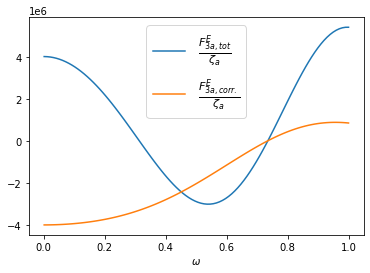

In [71]:
# Next, we compute the heave excitation force (first without correction due to columns)
zetaA=1. # [m]
g = 9.81 # [m/s^2]

D1 = 15. # [m]
L2 = 7.0 # [m]
L4 = 9.0 # [m]
B = 57.0 # [m]

zt = -D1
zm = -(D1+0.5*D2)

# Dispersion relation
k = lambda omega: omega**2/g

# Excitation force amplitude in heave
F3eA = lambda omega: -omega**2*zetaA*np.exp(k(omega)*zm)*(rho*Vp + A33p)*np.cos(k(omega)*B/2.)

# Waterplane area = intersection area on pontoon top
Aw = 2.0*np.pi*(2*(L2/2.)**2 + 2*(L4/2.)**2)

# Correction due to columns:
F3corr = lambda omega: -rho*g*zetaA*np.exp(k(omega)*zt)*Aw*np.cos(k(omega)*B/2.)

F3eAtot = lambda omega: F3eA(omega) - F3corr(omega)

omgvec = np.linspace(0.001, 1., 100)


plt.figure()
plt.plot(omgvec, F3eAtot(omgvec), label=r'$\frac{F_{3a,tot}^E}{\zeta_a}$')
plt.plot(omgvec, F3corr(omgvec), label=r'$\frac{F_{3a, corr.}^E}{\zeta_a}$')
plt.xlabel(r'$\omega$')
plt.legend(fontsize=16)

### Restoring force
The force originating from the vertical displacement from the equilibrium position caused the hydrostatic pressure is
$$F_3^{HS}=-C_{33}\eta_3=-\rho g A_w\eta_3$$

In [37]:
# Restoring coefficient:
C33 = rho*g*Aw

print("C33={:.2e} N/m".format(C33))

C33=4.01e+06 N/m


### Equation of motion in heave
Using Newton's 2nd law, we obtain the dynamic equation for the heave motion as
$$M\ddot{\eta}_3=\sum F_3 = F_3^{E}-A_{33}^P-C_{33}\eta_3$$
or
$$(M+A_{33}^P)\ddot{\eta}_3 + C_{33}\eta_3=F_3^{E}$$
The resulting motion amplitude is
$$\eta_{3a}=\frac{F_{3a}^{E}(\omega)}{-\omega^2(M+A_{33}^P) + C_{33}}$$

### Heave natural frequency
The heave natural frequency is found from the solution to the homogeneous equation
$$(M+A_{33}^P)\ddot{\eta}_3 + C_{33}\eta_3=0$$
reading $\eta_3(t)=\eta_{3A}\cos(\omega_3 t+\delta)$, which yields
$$\omega_3=\sqrt{\frac{C_{33}}{M+A_{33}^P}}$$
Correspondingly, the natural period in heave is $T_3=2\pi/\omega_3$
$$T_3=2\pi\sqrt{\frac{M+A_{33}^P}{C_{33}}}$$

Inspection of the heave excitation forces revails that the excitation force amplitude is zero at some wave lengths due to cancellation effects.
The corresponding wave periods are
$$T_k^{(1)}=2\pi\sqrt{\frac{(V_P+A_{33}^P/\rho)/A_W -z_t+z_m}{g}}$$
and
$$T_k^{(2)}=2\pi\sqrt{\lambda \frac{2\pi}{g}}=2\pi\sqrt{\left(\frac{2B}{2n+1}\right)\left(\frac{2\pi}{g}\right)}$$

T3=21.856
T1k=20.080
T2k,(n=0)=8.545


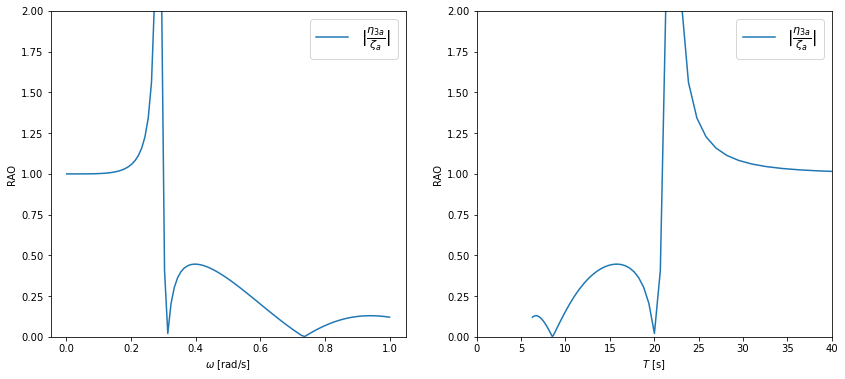

In [85]:
# Displacement of semi-submercible
# We have already found the displacement of the pontoons, but we need to add displacement of the vertical columns
Vc = Aw*D1

# Total mass of the structure
M = rho*(Vp + Vc)

# Motion amplitude
eta3a = lambda omega: np.abs(F3eAtot(omega)/(-omega**2*(M+A33p) + C33))

# Heave natural period
omega3 = np.sqrt(C33/(M+A33p))
T3 = 2*np.pi/omega3

# Cancellation frequencies of the excitation force
Tk1 = 2*np.pi*np.sqrt(((Vp+A33p/rho)/Aw -zt+zm)/g)
Tk2n = lambda n: np.sqrt(2*B/(2.*n + 1.)*(2.*np.pi/g))

print("T3={:.3f}".format(T3))
print("T1k={:.3f}".format(Tk1))
print("T2k,(n=0)={:.3f}".format(Tk2n(0)))

# Plot results
gs = gridspec.GridSpec(nrows=1, ncols=2)
fig = plt.figure(figsize=(14,6))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(omgvec, eta3a(omgvec), label=r'$|\frac{\eta_{3a}}{\zeta_a}|$')
ax1.set_xlabel(r'$\omega$ [rad/s]')
ax1.set_ylabel('RAO')
ax1.set_ylim(ymax=2, ymin=0)
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(2*np.pi/omgvec, eta3a(omgvec), label=r'$|\frac{\eta_{3a}}{\zeta_a}|$')
#ax2.axvline(T3, linestyle='--', color='k', label=r'$T_3$')
#ax2.axvline(Tk1, linestyle='--', color='r', label=r'$T_k^{(1)}$')
#ax2.axvline(Tk2n(0), linestyle='--', color='g', label=r'$T_k^{(2)}$')
ax2.set_xlabel(r'$T$ [s]')
ax2.set_ylabel('RAO')
ax2.set_ylim(ymax=2, ymin=0)
ax2.set_xlim(xmax=40, xmin=0)
ax2.legend(fontsize=16)


### Reflections
* Why do we predict infinite heave response at resonance for the above example?
* What force limit the response at resonance?
* Which physical effect is likely to be important for the damping?
* How could we include cross-flow drag in our strip theory formulation?

## Example: Wave induced motions of semi-submercible platform for 10 MW offshore wind turbine
Now consider a different type of semi-submercible used as support structure for a large 10 MW offshore wind turbine at deep water.
<div>
<img src="Figures/semisub_turbine_sideview.PNG" width="400">
</div>
<div>
<img src="Figures/semisub_turbine_topview.PNG" width="350">
</div>

In [17]:
# Dimensions of concrete semi-submercible platform for 10 MW offshore wind turbine
feet_to_meters = 1./3.2808 # [m/ft]   unit conversion
inches_to_meters = 0.0254  # [m/inch] unit conversion

D = 311*feet_to_meters + 6*inches_to_meters # Base diameter
R = 0.5*D                                   # Base radius
d = 37*feet_to_meters                       # Column diameter
hb = 65*feet_to_meters + 7.5*inches_to_meters # Total draft (depth to bottom of pontoon)
ht = 44*feet_to_meters + 4.5*inches_to_meters # Depth to top of pontoon

# Pontoon cross-section:
width = d
height = hb-ht

print("Base diameter   : {:.2f} m".format(D))
print("Column diameter : {:.2f} m".format(d))
print("Total draft     : {:.2f} m".format(hb))
print("Depth to pontoon: {:.2f} m".format(ht))
print("Pontoon width   : {:.2f} m".format(width))
print("Pontoon height  : {:.2f} m".format(height))

Base diameter   : 94.95 m
Column diameter : 11.28 m
Total draft     : 20.00 m
Depth to pontoon: 13.53 m
Pontoon width   : 11.28 m
Pontoon height  : 6.48 m


It is convenient to introduce polar coordinates:
$$x=r\cos(\theta)$$
$$y=r\sin(\theta)$$
Hence, the vertical particle acceleration is found as
$$a_z=-\omega^2\zeta_a \mathrm{e}^{kz}\sin(\omega t-kr\cos(\theta))$$
Using trigonometric identities, we can write
$$a_z=-\omega^2\zeta_a \mathrm{e}^{kz}\left\{\sin(\omega t)\cos(kr\cos(\theta)) - \cos(\omega t)\sin(kr\cos(\theta))\right\}$$
The vertical excitation force on a radial strip $dr$ of the pontoons is thus
$$dF^e_3=(\rho A+A_{33}^{2d})\omega^2\zeta_a \mathrm{e}^{kz_m}\sum_{i=1}^3\left\{\sin(\omega t)\cos(kr\cos(\theta_i)) - \cos(\omega t)\sin(kr\cos(\theta_i))\right\} dr$$
Integration from $r=0$ to $r=R$ yields
$$F^e_3=(\rho A+A_{33}^{2d})g\zeta_a \mathrm{e}^{kz_m}\sum_{i=1}^3\left\{\sin(\omega t)\sin(kR\cos(\theta_i)) + \cos(\omega t)[\cos(kR\cos(\theta_i))-1]\right\}/\cos(\theta_i)$$
$$F^e_3=(\rho A+A_{33}^{2d})g\zeta_a \mathrm{e}^{kz_m}\left\{ \left(\sum_{i=1}^3\frac{\sin(kR\cos(\theta_i))}{\cos(\theta_i)}\right)\sin(\omega t) + \left(\sum_{i=1}^3\frac{(\cos(kR\cos(\theta_i))-1)}{\cos(\theta_i)}\right)\cos(\omega t)\right\}$$
The force amplitude is then
$$F^e_{3a}=(\rho A+A_{33}^{2d})g\zeta_a \mathrm{e}^{kz_m} \sqrt{c_1^2+c_2^2}$$
where
$$c_1=\sum_{i=1}^3\frac{\sin(kR\cos(\theta_i))}{\cos(\theta_i)}$$
$$c_2=\sum_{i=1}^3\frac{(\cos(kR\cos(\theta_i))-1)}{\cos(\theta_i)}$$


237.245790540819
Heave natural frequency: Tn3=20.36


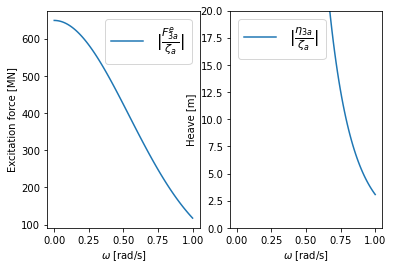

In [37]:
# Excitation forces by use of strip theory
rho = 1025.

area2d = width*height   # [m^2] Cross-section area of pontoon
zm = -(ht + 0.5*height) # [m] Depth to area center of cross-section

# Divide pontoons into strips
rvec, dr = np.linspace(0, 0.5*D, 50, retstep=True)
rmvec = np.diff(rvec) # Strip mean radial coordinate
Nstrip = len(rmvec)   # Number of strips

# Pontoon angles
theta1 = 0. * np.pi/180.
theta2 = -120. * np.pi/180.
theta3 = 120. * np.pi/180.

# Added masses of 2d cross-section:
a22_2d = 1.4*rho*area2d*height/width # Coefficient from Fig. 3.25
a33_2d = 1.4*rho*area2d*width/height # Coefficient from Fig. 3.25

# wave number vector from deep water dispersion relation
omgvec = np.linspace(0.001, 1., 100)
kvec = omgvec**2/9.81

# Integration of vertical acceleration along pontoons yields, when using x=Rcos(theta):
thetavec = [theta1, theta2, theta3]
c1vec = np.array([np.sin(kvec*R*np.cos(theta))/np.cos(theta) for theta in thetavec]) # cos(omega*t) terms
c1m = np.sum(c1vec)
c2vec = np.array([(np.cos(kvec*R*np.cos(theta))-1)/np.cos(theta) for theta in thetavec]) # sin(omega*t) terms
c2m = np.sum(c2vec)
Cm = np.sqrt(c1m**2 + c2m**2)

delta = np.arctan(c2m/c1m)


# Excitation force amplitude in heave per wave amplitude:
F3e_a = (rho*area2d + a33_2d) * g * np.exp(kvec*zm) * Cm 
# Above, we have used that omega**2/k = g

# Waterplane stiffness
Aw = 4*(np.pi*d**2/4.)
C33 = rho*g*Aw

# Displacement
M = rho*(area2d*R*3 + Aw*ht)

# Added mass
A33 = a33_2d*R*3

# Natural heave frequency
omega3 = np.sqrt(C33/(M+A33))
Tn3 = 2*np.pi/omega3
print("Heave natural frequency: Tn3={:.2f}".format(Tn3))

RAO = np.abs(F3e_a/(C33-omgvec**2*(M+A33)))

# Plot surface elevation:
fig, ax = plt.subplots(1,2)
ax[0].plot(omgvec, F3e_a*10**(-6), label=r'$|\frac{F^e_{3a}}{\zeta_a}|$')
ax[0].set_xlabel(r'$\omega$ [rad/s]')
ax[0].set_ylabel('Excitation force [MN]')
#ax.set_ylim(ymax=2, ymin=0)
ax[0].legend(fontsize=16)

ax[1].plot(omgvec, np.abs(RAO), label=r'$|\frac{\eta_{3a}}{\zeta_a}|$')
ax[1].set_xlabel(r'$\omega$ [rad/s]')
ax[1].set_ylabel('Heave [m]')
ax[1].set_ylim(ymax=20, ymin=0)
ax[1].legend(fontsize=16)
